# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

cities

Number of cities in the list: 617


['chuy',
 'ouadda',
 'dikson',
 'ushuaia',
 'jamestown',
 'grand centre',
 'hobart',
 'watrous',
 'barrow',
 'bluff',
 'port blair',
 'rikitea',
 'mataura',
 'bengkulu',
 'constitucion',
 'hermanus',
 'port alfred',
 'santa vitoria do palmar',
 'thompson',
 'taolanaro',
 'puerto ayora',
 'bilibino',
 'sekoma',
 'warqla',
 'aleksandrovskiy zavod',
 'fukue',
 'port moresby',
 'hamada',
 'mys shmidta',
 'dillon',
 'cherskiy',
 'inverell',
 'poronaysk',
 'pleshanovo',
 'arlit',
 'hunza',
 'norman wells',
 'samana',
 'villa maria',
 'arkhipo-osipovka',
 'egvekinot',
 'narsaq',
 'barentsburg',
 'illoqqortoormiut',
 'tilichiki',
 'new norfolk',
 'lebu',
 'vaini',
 'ponta delgada',
 'dunedin',
 'kruisfontein',
 'maragogi',
 'fortuna',
 'hosdurga',
 'san',
 'havre-saint-pierre',
 'okhotsk',
 'ancud',
 'kununurra',
 'bredasdorp',
 'avarua',
 'qaanaaq',
 'komsomolskiy',
 'todos santos',
 'yellowknife',
 'otradnoye',
 'tuatapere',
 'ribeira grande',
 'christchurch',
 'ponta do sol',
 'torbay',
 'c

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "units=Imperial&APPID=" + weather_api_key + "&q=" + city.replace(" ", "+")

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp =  city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

#     If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | ouadda
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | grand centre
City not found. Skipping...
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | watrous
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | port blair
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | bengkulu
Processing Record 15 of Set 1 | constitucion
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | santa vitoria do palmar
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | puerto ayora
Processing Record

In [4]:
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': 28.9103, 'lat': 57.0209},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 25.48,
  'feels_like': 20.5,
  'temp_min': 25.48,
  'temp_max': 25.48,
  'pressure': 1036,
  'humidity': 97,
  'sea_level': 1036,
  'grnd_level': 1019},
 'visibility': 215,
 'wind': {'speed': 4.05, 'deg': 106, 'gust': 11.9},
 'snow': {'1h': 0.13},
 'clouds': {'all': 100},
 'dt': 1669772684,
 'sys': {'country': 'RU', 'sunrise': 1669788932, 'sunset': 1669815044},
 'timezone': 10800,
 'id': 503965,
 'name': 'Pushkinskiye Gory',
 'cod': 200}

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chuy,-33.6971,-53.4616,66.02,90,0,10.36,UY,1669772541
1,ouadda,8.0777,22.4007,76.17,39,100,0.96,CF,1669772541
2,dikson,73.5069,80.5464,1.42,100,96,4.05,RU,1669772542
3,ushuaia,-54.8000,-68.3000,46.06,71,75,11.50,AR,1669772542
4,jamestown,42.0970,-79.2353,45.99,83,0,11.99,US,1669772542


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chuy,-33.6971,-53.4616,66.02,90,0,10.36,UY,1669772541
1,ouadda,8.0777,22.4007,76.17,39,100,0.96,CF,1669772541
2,dikson,73.5069,80.5464,1.42,100,96,4.05,RU,1669772542
3,ushuaia,-54.8000,-68.3000,46.06,71,75,11.50,AR,1669772542
4,jamestown,42.0970,-79.2353,45.99,83,0,11.99,US,1669772542


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

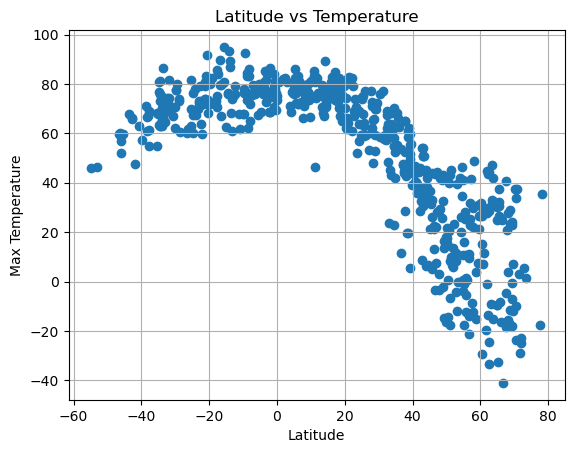

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title( "Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

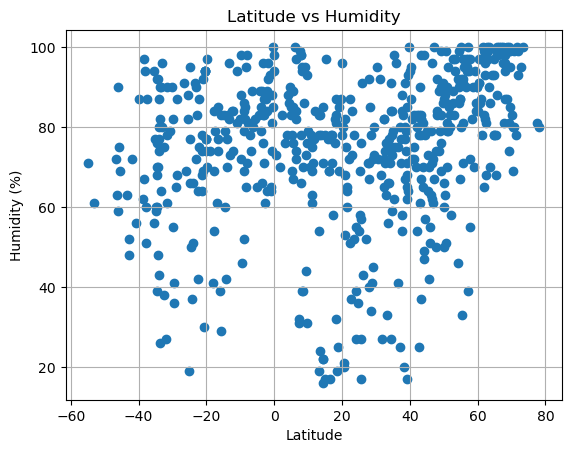

In [10]:
#building my scatterplot for lat vs humidity

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title( "Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

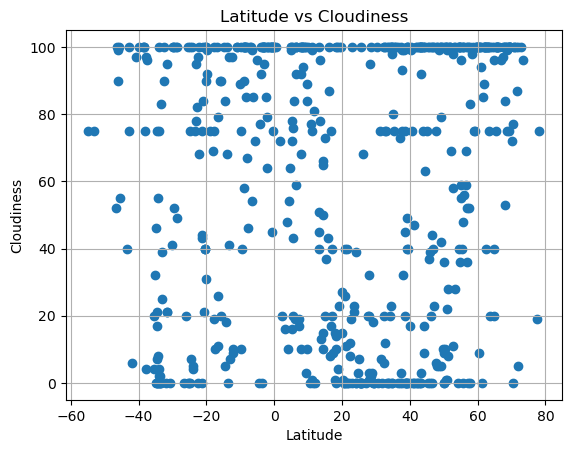

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title( "Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.grid()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

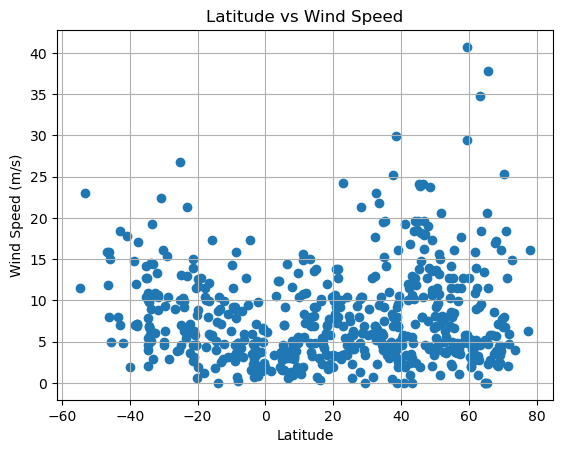

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title( "Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.grid()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lin_regress_plotting(x_values, y_values, txt_coord, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,txt_coord,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ouadda,8.0777,22.4007,76.17,39,100,0.96,CF,1669772541
2,dikson,73.5069,80.5464,1.42,100,96,4.05,RU,1669772542
4,jamestown,42.0970,-79.2353,45.99,83,0,11.99,US,1669772542
6,watrous,51.6668,-105.4679,6.58,85,100,14.97,CA,1669772543
7,barrow,71.2906,-156.7887,3.22,78,100,12.66,US,1669772384


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chuy,-33.6971,-53.4616,66.02,90,0,10.36,UY,1669772541
3,ushuaia,-54.8000,-68.3000,46.06,71,75,11.50,AR,1669772542
5,hobart,-42.8794,147.3294,66.06,48,75,18.41,AU,1669772452
8,bluff,-46.6000,168.3333,59.81,72,52,15.90,NZ,1669772543
10,rikitea,-23.1203,-134.9692,72.34,72,78,13.00,PF,1669772544


###  Temperature vs. Latitude Linear Regression Plot

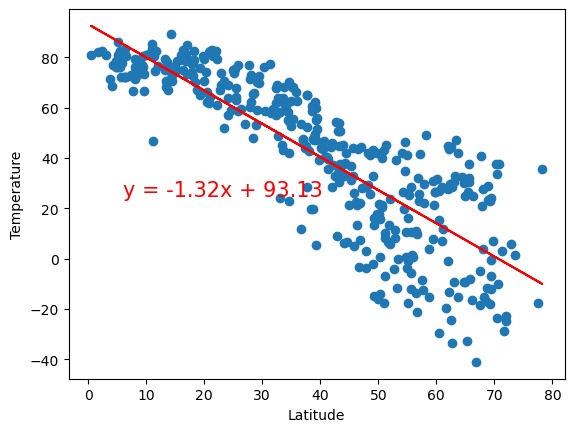

In [16]:
# Linear regression on Northern Hemisphere
lin_regress_plotting(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(6,25),'Temperature')


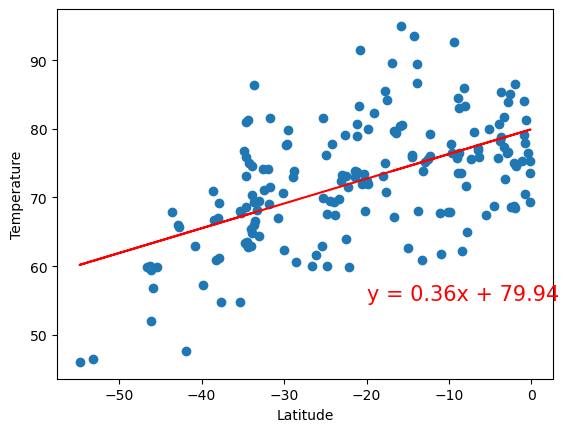

In [17]:
# Linear regression on Southern Hemisphere
lin_regress_plotting(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-20,55),'Temperature')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [1]:
#There is a strong negative correlation between decreasing temperatures and increasing latitudes in the Northern hemisphere.
#In the Southern hemisphere, the relationship beteen temperature and latitude is actually positive, but the strength is not as strong as it is for the northern hemisphere. 
#This means that as temperatures decrease, the farther they are from the equator but this is stronger for the northern hemisphere than southern.

### Humidity vs. Latitude Linear Regression Plot

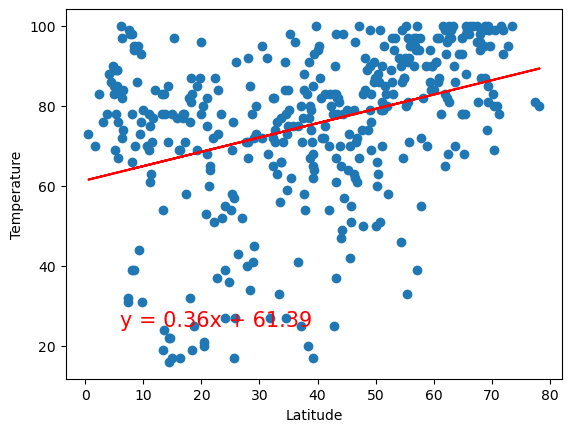

In [18]:
# Northern Hemisphere
lin_regress_plotting(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(6,25),'Temperature')

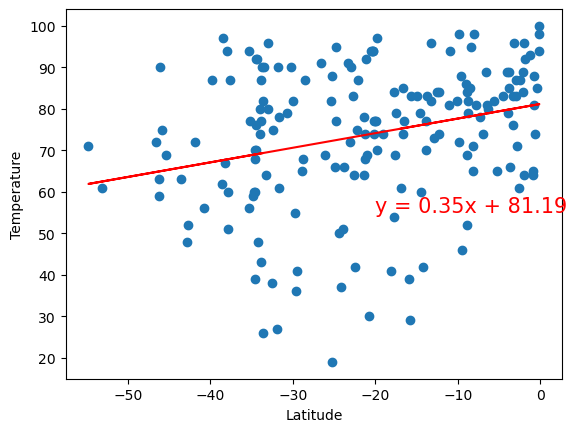

In [19]:
# Southern Hemisphere
lin_regress_plotting(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-20,55),'Temperature')

In [ ]:
#there is a positive relationship between increasing humidity and increasing latitudes with temperature in both the northern and southern hemispheres. the relationship is slightly stronger for the northern hemisphere.
# this shows that humidity is correlated with temperature when movind towards and away from the equator

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

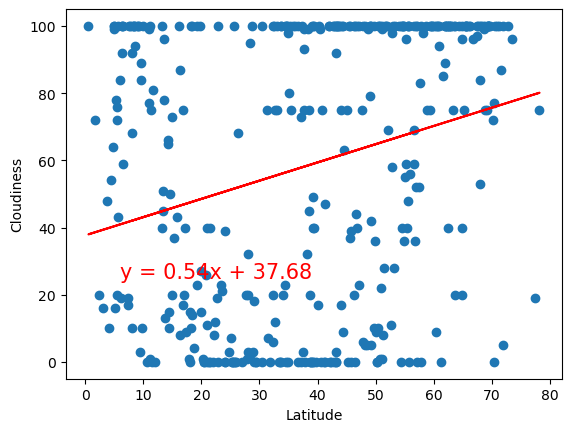

In [23]:
# Northern Hemisphere
lin_regress_plotting(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(6,25),'Cloudiness')

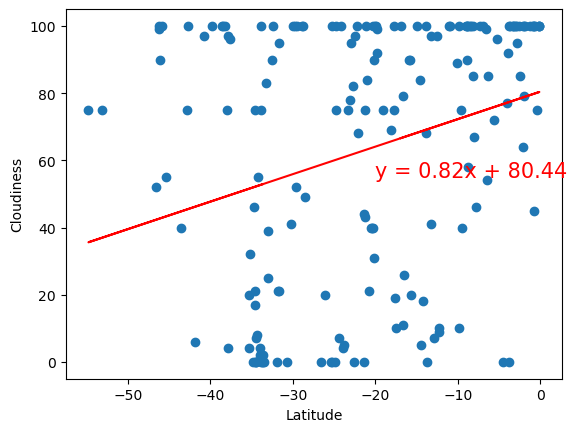

In [24]:
# Southern Hemisphere
lin_regress_plotting(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-20,55),'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#there is a positive relationship between cloudiness and increased latitude for both southern and norther hemispheres. 
# However, the strength of this relationship is stronger particularly when moving up to the equator from the southern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

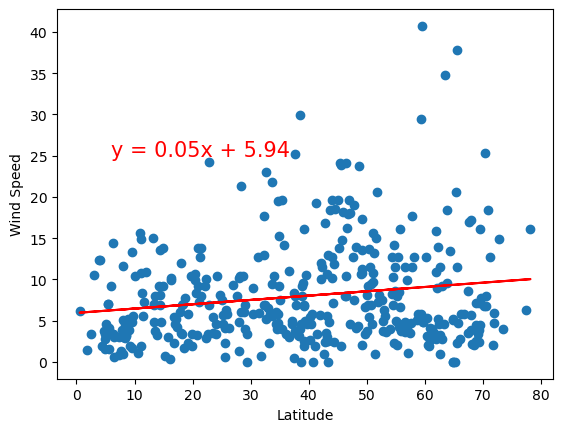

In [26]:
# Northern Hemisphere
lin_regress_plotting(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(6,25),'Wind Speed')

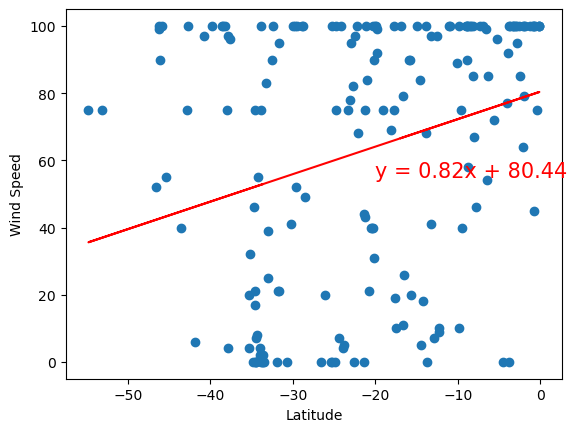

In [27]:
# Southern Hemisphere
lin_regress_plotting(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-20,55),'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#wind speed seems to have more variance as latitude increases in the southern hemisphere than it does in the northern.
# both northern and southern hemispheres have positive relationships with increased wind speed and increasing latitude.